In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
import warnings
warnings.filterwarnings('ignore')

# Effective strategies for using and teaching GPU Accelerated Image Analysis

This presentation will summarize technologies used and lessons learned at the 2023 PoL (Physics of Life) BioImage Analysis Symposium and training school, GPU Accelerated Image Analysis track. 

# PoL BioImage Analysis Symposium 2023

* Dresden August 28th - September 1st 2023
* 2.5 day training school followed by 2.5 day symposium
    + Early career track
    + GPU Accelerated Track

## Course Outline of GPU Accelerated Track

* Course Preparation (Installing and setting up tools)
* Clesperanto (OpenCL Bio-imaging toolkit)
* Clesperanto Assistant (Napari plugin for Clesperanto)
* Cupy
* Deconvolution
* HPC Intro
* Clesperanto on HPC
* PyTorch (Deep Learning)
* AI Segmentation and denoising
* Image Analysis with Dask

# Clesperanto

GPU-accelerated image processing across languages and platforms

* [CLIJ](https://github.com/clij) OpenCl for ImageJ
* [pyclesperanto_prototype](https://github.com/clEsperanto/pyclesperanto_prototype)
    * python wrappers to CLIJ
* [CLIc_prototype](https://github.com/clEsperanto/CLIc_prototype)
    * pure c++ implementation intended to be wrapped by high level (Python, Java) languages.
* [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype)
    * python wrapp to CLIc_prototype

# Clesperanto

In [2]:
import pyclesperanto_prototype as cle

# initialize / select GPU with "TX" in their name
device = cle.select_device("TX")
print("Used GPU: ", device)


Used GPU:  <NVIDIA GeForce RTX 4070 Laptop GPU on Platform: NVIDIA CUDA (1 refs)>


# Clesperanto

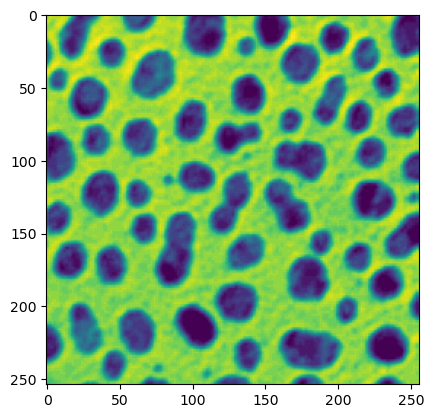

In [3]:
image = imread('https://imagej.nih.gov/ij/images/blobs.gif')
image = np.squeeze(image)
image = image[:,:,0]
plt.imshow(image)

# Clesperanto

Number of objects in the image: 62.0


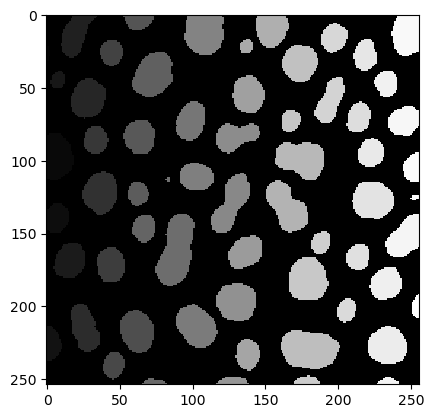

In [7]:
# process the image
inverted = cle.subtract_image_from_scalar(image, scalar=255)
blurred = cle.gaussian_blur(inverted, sigma_x=1, sigma_y=1)
binary = cle.threshold_otsu(blurred)
labeled = cle.connected_components_labeling_box(binary)
num_labels = labeled.max()
print(f"Number of objects in the image: {num_labels}")
cle.imshow(labeled)

# CuPy

* Cuda based GPU-accelerated image and data processing in Python
* Dropin replacement for numpy and scipy
* API of Cupy is "close" to numpy and scipy so dropin strategy can potentially be used

# CuPy dropin 

In [5]:
try:
    import cupy as xp
except:
    import numpy as xp

type(xp)
print(xp)
#xp_image = xp.asarray(image)

<module 'cupy' from '/home/bnorthan/mambaforge/envs/deconvolution-napari-env/lib/python3.9/site-packages/cupy/__init__.py'>


In [6]:
print('hello')

hello
